In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

e:\coodingtool\python\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\coodingtool\python\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\coodingtool\python\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\coodingtool\python\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

In [2]:
#load the data
table_04=pd.read_excel("2020.04-2020.07(fabric width for HKU).xlsx")
table_07=pd.read_excel("2020.07-2020.10(fabric width for HKU).xlsx")
table_10=pd.read_excel("2020.10-2021.01(fabric width for HKU).xlsx")
table_01=pd.read_excel("2021.01-2021.04(fabric width for HKU).xlsx")
table_all=pd.concat([table_04,table_07,table_10,table_01], axis=0)
table_all.head()

,ETD-出货日期,GF_NO-品名,job_no-排单号,fabric_no-布号,fnsend_no-后整送布单,Quantity-卷长,design_width-工艺门幅,Actual_width-实际门幅,Fabric_Type-布种代码,Warp_Density-经密,...,SUM_Reeding-入筘数,reed_width-筘幅,ReedNo_type-筘号整理类别,Finish_list-整理方式,Mercerizing-丝光,Wash_Method-水洗方式,FabricNumber-织物组织类别,Color_Type-是否本白,Is_Piece_Dye-是否CPB,Shrinkage-纬向缩水标准(分档前)
0,2020-04,DC4040-19D898KMY,PT202189,Q21112220001,FA2003190106,94.8,58.5,58.5,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
1,2020-04,DC4040-19D898KMY,PT202189,Q21112220002,FA2003190106,93.0,58.5,58.8,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
2,2020-04,DC4040-19D898KMY,PT202189,Q21112220004,FA2003190106,55.5,58.5,58.5,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
3,2020-04,DC4040-19D898KMY,PT202189,Q21112220005,FA2003190106,94.8,58.5,59.0,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
4,2020-04,DC4040-19D898KMY,PT202189,Q21112220006,FA2003190106,75.0,58.5,58.8,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0


In [3]:
drop_cols1=['ETD-出货日期','GF_NO-品名','job_no-排单号','fabric_no-布号','fnsend_no-后整送布单']
data=table_all.drop(drop_cols1,axis=1)
data.head()

,Quantity-卷长,design_width-工艺门幅,Actual_width-实际门幅,Fabric_Type-布种代码,Warp_Density-经密,Weft_Density-纬密,F_Actual_count-纬向纱支,W_Actual_count-经向纱支,Component-成分,Reed_NO-筘号,SUM_Reeding-入筘数,reed_width-筘幅,ReedNo_type-筘号整理类别,Finish_list-整理方式,Mercerizing-丝光,Wash_Method-水洗方式,FabricNumber-织物组织类别,Color_Type-是否本白,Is_Piece_Dye-是否CPB,Shrinkage-纬向缩水标准(分档前)
0,94.8,58.5,58.5,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
1,93.0,58.5,58.8,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
2,55.5,58.5,58.5,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
3,94.8,58.5,59.0,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
4,75.0,58.5,58.8,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0


In [4]:
#clean the data
#fabric_type to int 
Fabric_Type_dummpy = pd.get_dummies(data['Fabric_Type-布种代码'],drop_first=False,prefix='Fabric_Type')
Component_dummpy = pd.get_dummies(data['Component-成分'],drop_first=False,prefix='Component')
SUM_Reeding_dummpy = pd.get_dummies(data['SUM_Reeding-入筘数'],drop_first=False,prefix='SUM_Reeding')
ReedNo_type_dummpy = pd.get_dummies(data['ReedNo_type-筘号整理类别'],drop_first=False,prefix='ReedNo_type')
Finish_list_dummpy = pd.get_dummies(data['Finish_list-整理方式'],drop_first=False,prefix='Finish_list')
Mercerizing_dummpy = pd.get_dummies(data['Mercerizing-丝光'],drop_first=False,prefix='Mercerizing')
Wash_Method_dummpy = pd.get_dummies(data['Wash_Method-水洗方式'],drop_first=False,prefix='Wash_Method')
Color_Type_dummpy = pd.get_dummies(data['Color_Type-是否本白'],drop_first=False,prefix='Color_Type')
F_Actual_count_dummpy = pd.get_dummies(data['F_Actual_count-纬向纱支'],drop_first=False,prefix='F_Actual_count')
W_Actual_count_dummpy = pd.get_dummies(data['W_Actual_count-经向纱支 '],drop_first=False,prefix='W_Actual_count')
dummpy_data = pd.concat([Fabric_Type_dummpy, Component_dummpy, SUM_Reeding_dummpy, ReedNo_type_dummpy, Finish_list_dummpy, Mercerizing_dummpy, Wash_Method_dummpy, Color_Type_dummpy, F_Actual_count_dummpy, W_Actual_count_dummpy], axis =1)
dummpy_data.head()

,Fabric_Type_C,Fabric_Type_D,Fabric_Type_H,Fabric_Type_J,Fabric_Type_K,Fabric_Type_O,Fabric_Type_P,Fabric_Type_S,Component_100.0% CTN,Component_100.0% LINEN,...,W_Actual_count_70+30,W_Actual_count_70+40,W_Actual_count_70+50,W_Actual_count_70+60\30D,W_Actual_count_8,W_Actual_count_80,W_Actual_count_80+40+15,W_Actual_count_80+40+20,W_Actual_count_85,W_Actual_count_88D/36F
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
drop_cols2=['Fabric_Type-布种代码','Component-成分','SUM_Reeding-入筘数','ReedNo_type-筘号整理类别','Finish_list-整理方式','Mercerizing-丝光','Wash_Method-水洗方式','Color_Type-是否本白','F_Actual_count-纬向纱支', 'W_Actual_count-经向纱支 ']
data=data.drop(drop_cols2,axis=1)

In [6]:
newdata = pd.concat([data,dummpy_data],axis =1)
newdata.head()

,Quantity-卷长,design_width-工艺门幅,Actual_width-实际门幅,Warp_Density-经密,Weft_Density-纬密,Reed_NO-筘号,reed_width-筘幅,FabricNumber-织物组织类别,Is_Piece_Dye-是否CPB,Shrinkage-纬向缩水标准(分档前),...,W_Actual_count_70+30,W_Actual_count_70+40,W_Actual_count_70+50,W_Actual_count_70+60\30D,W_Actual_count_8,W_Actual_count_80,W_Actual_count_80+40+15,W_Actual_count_80+40+20,W_Actual_count_85,W_Actual_count_88D/36F
0,94.8,58.5,58.5,165.0,95.0,140.0,69.46,15,0,-2.0,...,0,0,0,0,0,0,0,0,0,0
1,93.0,58.5,58.8,165.0,95.0,140.0,69.46,15,0,-2.0,...,0,0,0,0,0,0,0,0,0,0
2,55.5,58.5,58.5,165.0,95.0,140.0,69.46,15,0,-2.0,...,0,0,0,0,0,0,0,0,0,0
3,94.8,58.5,59.0,165.0,95.0,140.0,69.46,15,0,-2.0,...,0,0,0,0,0,0,0,0,0,0
4,75.0,58.5,58.8,165.0,95.0,140.0,69.46,15,0,-2.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#split the train dataset and test dataset
original= newdata.values
Y = original[:,2]
diff_set = list(set(range(original.shape[1])) - set([2]))
X = original[:,diff_set]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=1234)
X_train.shape
x_data = X_train
y_data = Y_train.reshape((-1,1))

In [13]:
#模型调参#
#参数选择
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
input_size=X_train.shape[1]
output_size=1
data_size=X_train.shape[0]
batch_size=500
width_list = [5,10,20] 
depth_list = range(5,9)#5-10
lr_list = [0.002,0.003,0.004]
x=tf.placeholder(tf.float32,shape=(None,input_size))
y=tf.placeholder(tf.float32,shape=(None,output_size))
def networks(x,depth,width):
    w_input=tf.Variable(tf.random_normal([input_size,width_size],stddev=1))
    w_hidden=tf.Variable(tf.random_normal([width_size,width_size],stddev=1))
    b_hidden=tf.Variable(tf.zeros([1,width_size],dtype=tf.float32))
    w_output=tf.Variable(tf.random_normal([width_size,output_size],stddev=1))
    h=tf.matmul(x,w_input)+b_hidden
    for _ in range(depth):
        h=tf.matmul(h,w_hidden)+b_hidden
    y_pred=tf.matmul(h,w_output)
    return y_pred
for depth_size in depth_list:
    for width_size in width_list:
        for learning_rate in lr_list:
            y_pred = networks(x, depth_size, width_size)
            MSE_loss=tf.reduce_mean(tf.square(y-y_pred))
            train_step=tf.train.AdamOptimizer(learning_rate).minimize(MSE_loss)
            saver = tf.train.Saver()
            with tf.Session() as sess:
                init_op=tf.global_variables_initializer()
                sess.run(init_op)
                STEPS = 10000
                for i in range(STEPS):
                    start = max((i * batch_size) % 1000,20)
                    end = min(start + batch_size, 1000) 
                    sess.run(train_step,feed_dict={x:x_data[start:end],y:y_data[start:end]})
                MSE = sess.run(MSE_loss, feed_dict={x:x_data[start:end],y:y_data[start:end]})
                print('lr为：',learning_rate, 'depth:',depth_size, 'width:', width_size,'MSE:', MSE)

lr为： 0.002 depth: 5 width: 5 MSE: 5726.265
lr为： 0.003 depth: 5 width: 5 MSE: 2536.0435
lr为： 0.004 depth: 5 width: 5 MSE: 1106.0272
lr为： 0.002 depth: 5 width: 10 MSE: 15721.404
lr为： 0.003 depth: 5 width: 10 MSE: 557.7309
lr为： 0.004 depth: 5 width: 10 MSE: 288074.6
lr为： 0.002 depth: 5 width: 20 MSE: 3041632.2
lr为： 0.003 depth: 5 width: 20 MSE: 2906571.0
lr为： 0.004 depth: 5 width: 20 MSE: 193195.8
lr为： 0.002 depth: 6 width: 5 MSE: 72.47042
lr为： 0.003 depth: 6 width: 5 MSE: 55.565636
lr为： 0.004 depth: 6 width: 5 MSE: 3036.205
lr为： 0.002 depth: 6 width: 10 MSE: 2256142.2
lr为： 0.003 depth: 6 width: 10 MSE: 11232.182
lr为： 0.004 depth: 6 width: 10 MSE: 181087.78
lr为： 0.002 depth: 6 width: 20 MSE: 120769490.0
lr为： 0.003 depth: 6 width: 20 MSE: 12677746.0
lr为： 0.004 depth: 6 width: 20 MSE: 995824.1
lr为： 0.002 depth: 7 width: 5 MSE: 198618.56
lr为： 0.003 depth: 7 width: 5 MSE: 22215.354
lr为： 0.004 depth: 7 width: 5 MSE: 279.24405
lr为： 0.002 depth: 7 width: 10 MSE: 398942.47
lr为： 0.003 depth: 7 wid

In [14]:
#construct the network
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
input_size=X_train.shape[1]
output_size=1
data_size=X_train.shape[0]
batch_size=500
width_size= 5
depth_size=6
x=tf.placeholder(tf.float32,shape=(None,input_size))
y=tf.placeholder(tf.float32,shape=(None,output_size))
def networks(x,depth,width):
    w_input=tf.Variable(tf.random_normal([input_size,width_size],stddev=1,seed=1))
    w_hidden=tf.Variable(tf.random_normal([width_size,width_size],stddev=1,seed=1))
    b_hidden=tf.Variable(tf.zeros([1,width_size],dtype=tf.float32))
    w_output=tf.Variable(tf.random_normal([width_size,output_size],stddev=1,seed=1))
    h=tf.matmul(x,w_input)+b_hidden
    for _ in range(depth):
        h=tf.matmul(h,w_hidden)+b_hidden
    y_pred=tf.matmul(h,w_output)
    return y_pred
y_pred = networks(x, depth_size, width_size)
learning_rate=3e-3
cross_entropy=tf.reduce_mean(tf.square(y-y_pred))
train_step=tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
saver = tf.train.Saver()

In [15]:
#training process
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 100000
    error = []
    mean_list = []
    std_list = []
    for i in range(STEPS):
        start = max((i * batch_size) % 1000,20)
        end = min(start + batch_size, 1000) 
        sess.run(train_step,feed_dict={x:x_data[start:end],y:y_data[start:end]})
        if i % 100 == 0:
            total_cross_entropy = sess.run(cross_entropy,
                                           feed_dict={x: x_data[start:end], y:y_data[start:end]})
            print('训练%d次后，误差为%f' % (i, total_cross_entropy))
            error.append(total_cross_entropy)
            predict = sess.run(y_pred, feed_dict={x: x_data[start:end]})
            mean_list.append(np.mean(predict))
            std_list.append(np.std(predict))
    file_path="./test"
    save_path = saver.save(sess, file_path)
    predict = sess.run(y_pred, feed_dict={x: x_data})
    test_predict = sess.run(y_pred, feed_dict={x: X_test})

训练0次后，误差为141092339712.000000
训练100次后，误差为1148616704.000000
训练200次后，误差为649732736.000000
训练300次后，误差为385238432.000000
训练400次后，误差为239532960.000000
训练500次后，误差为156119328.000000
训练600次后，误差为106165928.000000
训练700次后，误差为74929144.000000
训练800次后，误差为54605980.000000
训练900次后，误差为40902164.000000
训练1000次后，误差为31362742.000000
训练1100次后，误差为24532564.000000
训练1200次后，误差为19519604.000000
训练1300次后，误差为15759793.000000
训练1400次后，误差为12885603.000000
训练1500次后，误差为10651505.000000
训练1600次后，误差为8889123.000000
训练1700次后，误差为7480737.000000
训练1800次后，误差为6342253.500000
训练1900次后，误差为5412483.000000
训练2000次后，误差为4646242.500000
训练2100次后，误差为4009626.000000
训练2200次后，误差为3476812.250000
训练2300次后，误差为3028024.750000
训练2400次后，误差为2647720.250000
训练2500次后，误差为2323806.250000
训练2600次后，误差为2046546.125000
训练2700次后，误差为1808222.875000
训练2800次后，误差为1602630.375000
训练2900次后，误差为1424589.250000
训练3000次后，误差为1269948.750000
训练3100次后，误差为1135244.500000
训练3200次后，误差为1017642.375000
训练3300次后，误差为914753.000000
训练3400次后，误差为824554.937500
训练3500次后，误差为745323.125000
训练3600次后，误差为6756

训练33200次后，误差为19.985388
训练33300次后，误差为18.583426
训练33400次后，误差为409.544830
训练33500次后，误差为10.304932
训练33600次后，误差为6.747931
训练33700次后，误差为5.567639
训练33800次后，误差为4.917538
训练33900次后，误差为4.470145
训练34000次后，误差为4.132822
训练34100次后，误差为3.868215
训练34200次后，误差为3.651049
训练34300次后，误差为3.471626
训练34400次后，误差为11.314135
训练34500次后，误差为17.613918
训练34600次后，误差为3.621408
训练34700次后，误差为3.383259
训练34800次后，误差为3.217383
训练34900次后，误差为3.077004
训练35000次后，误差为2.955202
训练35100次后，误差为18.719465
训练35200次后，误差为7.781878
训练35300次后，误差为3.054176
训练35400次后，误差为2.900708
训练35500次后，误差为2.774034
训练35600次后，误差为2.661432
训练35700次后，误差为2.564093
训练35800次后，误差为13.960606
训练35900次后，误差为7.272178
训练36000次后，误差为2.618465
训练36100次后，误差为2.495040
训练36200次后，误差为2.388393
训练36300次后，误差为2.294656
训练36400次后，误差为2.421500
训练36500次后，误差为155.892365
训练36600次后，误差为2.549581
训练36700次后，误差为2.389207
训练36800次后，误差为2.270173
训练36900次后，误差为13.721101
训练37000次后，误差为109.238472
训练37100次后，误差为2.655179
训练37200次后，误差为2.428747
训练37300次后，误差为4.081110
训练37400次后，误差为101.281952
训练37500次后，误差为2.877646
训练37600次后，误差为2.5

训练70300次后，误差为0.374764
训练70400次后，误差为0.372352
训练70500次后，误差为0.369975
训练70600次后，误差为0.367593
训练70700次后，误差为0.365292
训练70800次后，误差为0.363115
训练70900次后，误差为0.361357
训练71000次后，误差为0.360330
训练71100次后，误差为0.361416
训练71200次后，误差为0.370255
训练71300次后，误差为0.382154
训练71400次后，误差为0.383025
训练71500次后，误差为0.352948
训练71600次后，误差为0.348731
训练71700次后，误差为0.342940
训练71800次后，误差为0.345456
训练71900次后，误差为0.357750
训练72000次后，误差为1.307436
训练72100次后，误差为0.336471
训练72200次后，误差为0.342122
训练72300次后，误差为0.349917
训练72400次后，误差为0.327629
训练72500次后，误差为0.430496
训练72600次后，误差为0.352424
训练72700次后，误差为0.330234
训练72800次后，误差为0.353091
训练72900次后，误差为0.342442
训练73000次后，误差为2.816384
训练73100次后，误差为0.334244
训练73200次后，误差为1.157368
训练73300次后，误差为0.325255
训练73400次后，误差为0.333334
训练73500次后，误差为1.832075
训练73600次后，误差为0.322796
训练73700次后，误差为0.403786
训练73800次后，误差为0.313375
训练73900次后，误差为0.395776
训练74000次后，误差为2.186856
训练74100次后，误差为8.149655
训练74200次后，误差为0.611410
训练74300次后，误差为0.467395
训练74400次后，误差为0.416167
训练74500次后，误差为0.469050
训练74600次后，误差为0.372134
训练74700次后，误差为0.391373
训练74800次后，

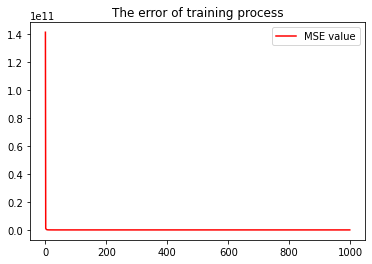

In [16]:
#the training error figure
s = range(1000)
plt.plot(s,error,color="red",label = "MSE value")
plt.legend()
plt.title('The error of training process')
plt.show()

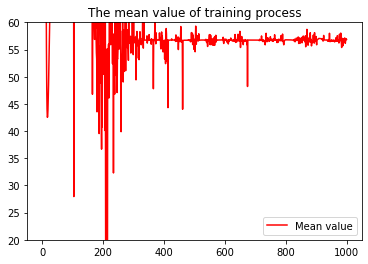

In [17]:
s = range(1000)
plt.plot(s,mean_list,color="red",label = "Mean value")
plt.legend()
plt.title('The mean value of training process')
plt.show()

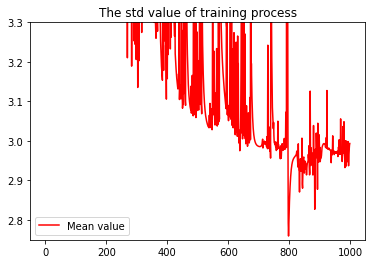

In [18]:
s = range(1000)
plt.plot(s,std_list,color="red",label = "Mean value")
plt.legend()
plt.title('The std value of training process')
plt.show()

In [19]:
#the mean of train datasets
print('the predicted mean value of train datasets is ',np.mean(predict))
print('the predicted std value of train datasets is ',np.std(predict))
print('the predicted mean value of test datasets is ',np.mean(test_predict))
print('the predicted std value of test datasets is ',np.std(test_predict))

the predicted mean value of train datasets is  57.00118
the predicted std value of train datasets is  2.9574754
the predicted mean value of test datasets is  57.006077
the predicted std value of test datasets is  2.9218588


In [20]:
print('the groundtruth mean value of train datasets is ',np.mean(Y_train))
print('the groundtruth std value of train datasets is ',np.std(Y_train))
print('the groundtruth mean value of test datasets is ',np.mean(Y_test))
print('the groundtruth std value of test datasets is ',np.std(Y_test))

the groundtruth mean value of train datasets is  56.826574073698595
the groundtruth std value of train datasets is  3.111896803761388
the groundtruth mean value of test datasets is  56.83154582319547
the groundtruth std value of test datasets is  3.0725785860752635


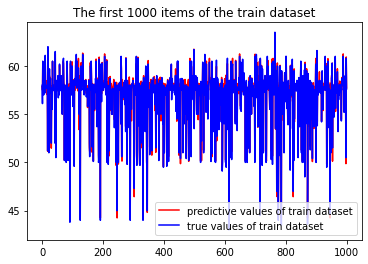

In [27]:
#results display
predict=predict.ravel()
orange=y_data.ravel()
t = np.arange(1000)
plt.plot(t,predict[0:1000],color="red",label='predictive values of train dataset')
plt.plot(t,orange[0:1000],color="blue",label='true values of train dataset')
plt.legend()
plt.title('The first 1000 items of the train dataset')
plt.show()

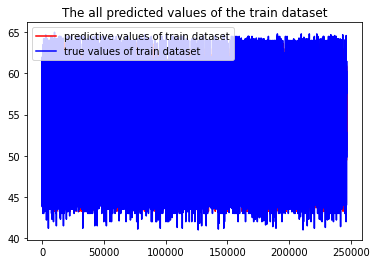

In [28]:
t = np.arange(data_size)
plt.plot(t,predict,color="red",label='predictive values of train dataset')
plt.plot(t,orange,color="blue",label='true values of train dataset')
plt.legend()
plt.title('The all predicted values of the train dataset')
plt.show()

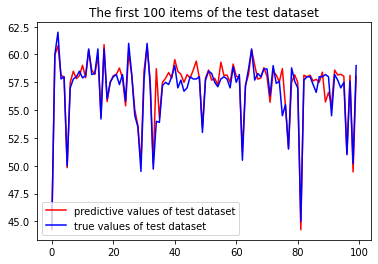

In [23]:
#test dataset results display
y_test_true = Y_test.ravel()
t = np.arange(1000)
plt.plot(t,test_predict[0:1000],color="red",label='predictive values of test dataset')
plt.plot(t,y_test_true[0:1000],color="blue",label='true values of test dataset')
plt.legend()
plt.title('The first 1000 items of the test dataset')
plt.show()

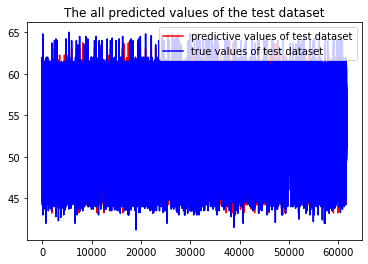

In [24]:
t = np.arange(Y_test.shape[0])
plt.plot(t,test_predict,color="red",label='predictive values of test dataset')
plt.plot(t,y_test_true,color="blue",label='true values of test dataset')
plt.legend()
plt.title('The all predicted values of the test dataset')
plt.show()

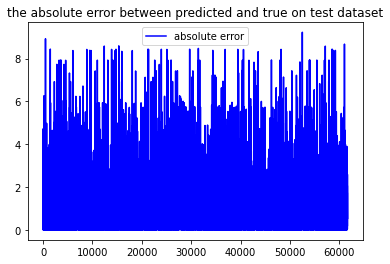

In [25]:
t = np.arange(Y_test.shape[0])
abs_error = np.abs(Y_test.ravel() - test_predict.ravel())
plt.plot(t,abs_error,color = "blue", label = "absolute error")
plt.legend()
plt.title("the absolute error between predicted and true on test dataset")
plt.show()

In [30]:
train_pred_mean = np.mean(predict)
train_pred_std = np.std(predict)
train_true_mean = np.mean(Y_train)
train_true_std = np.std(Y_train)
print(train_pred_mean,train_pred_std)
print(train_true_mean,train_true_std)

57.00118 2.9574754
56.826574073698595 3.111896803761388


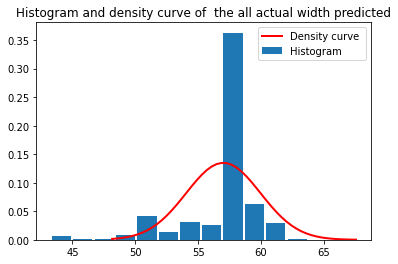

In [32]:
import scipy.stats as st 
s=np.random.normal(train_pred_mean, train_pred_std, 500)
s_fit = np.linspace(s.min(), s.max())
plt.plot(s_fit, st.norm(train_pred_mean, train_pred_std).pdf(s_fit), lw=2, c='r',label = "Density curve ")
plt.hist(predict,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of  the all actual width predicted")
plt.legend()
plt.show()

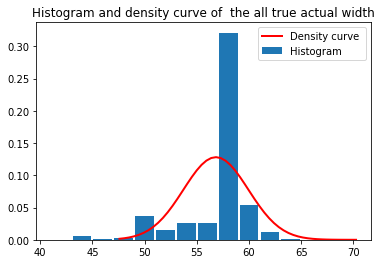

In [33]:
s=np.random.normal(train_true_mean, train_true_std, 500)
s_fit = np.linspace(s.min(), s.max())
plt.plot(s_fit, st.norm(train_true_mean,  train_true_std).pdf(s_fit), lw=2, c='r',label = "Density curve ")
plt.hist(Y_train,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of  the all true actual width")
plt.legend()
plt.show()

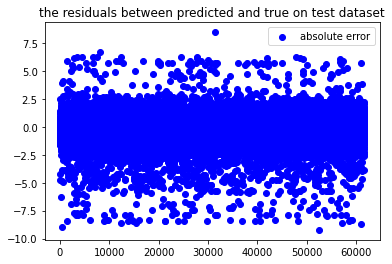

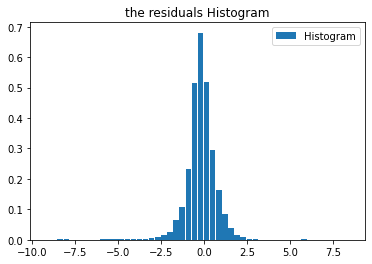

In [34]:
t = np.arange(Y_test.shape[0])
residuals = Y_test.ravel()-test_predict.ravel()
plt.scatter(t,residuals,color = "blue", label = "absolute error")
plt.legend()
plt.title("the residuals between predicted and true on test dataset")
plt.show()
plt.hist(residuals, bins=50,rwidth =0.9,density=True, label = "Histogram" )
plt.legend()
plt.title("the residuals Histogram")
plt.show()

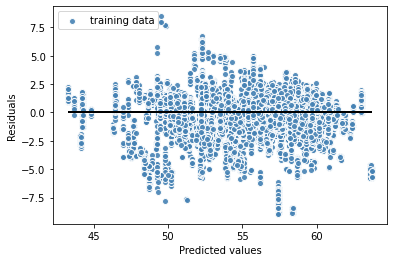

In [35]:
#残差分布图  r
plt.scatter(predict,Y_train-predict, c='steelblue',edgecolor='white',marker='o',alpha=0.9, label='training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=predict.min(), xmax=predict.max(), lw=2, color='black')
plt.show()

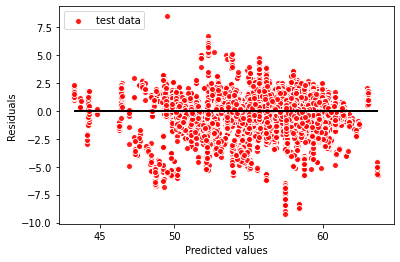

In [37]:
#残差分布图  r
plt.scatter(test_predict,Y_test.ravel()-test_predict.ravel(), c='red',edgecolor='white',marker='o',alpha=0.9, label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=test_predict.min(), xmax=test_predict.max(), lw=2, color='black')
plt.show()